In [88]:
#Importando os pacotes das bibliotecas
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score

from imblearn.over_sampling import SMOTE

In [7]:
#Carregando a base de dados
dataset = pd.read_csv('fraud_dataset.csv')
dataset.head(5)

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [9]:
#Varificando dados nulos no dataset
dataset.isnull().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

In [11]:
#Imprime informações sobre um DataFrame, incluindo o tipo de índice e colunas, valores não nulos e uso de memória.
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


In [14]:
#Obter as dimensões do dataframe
dataset.shape

(1000000, 8)

In [17]:
#Verificando linhas duplicadas
dataset.duplicated().sum()

0

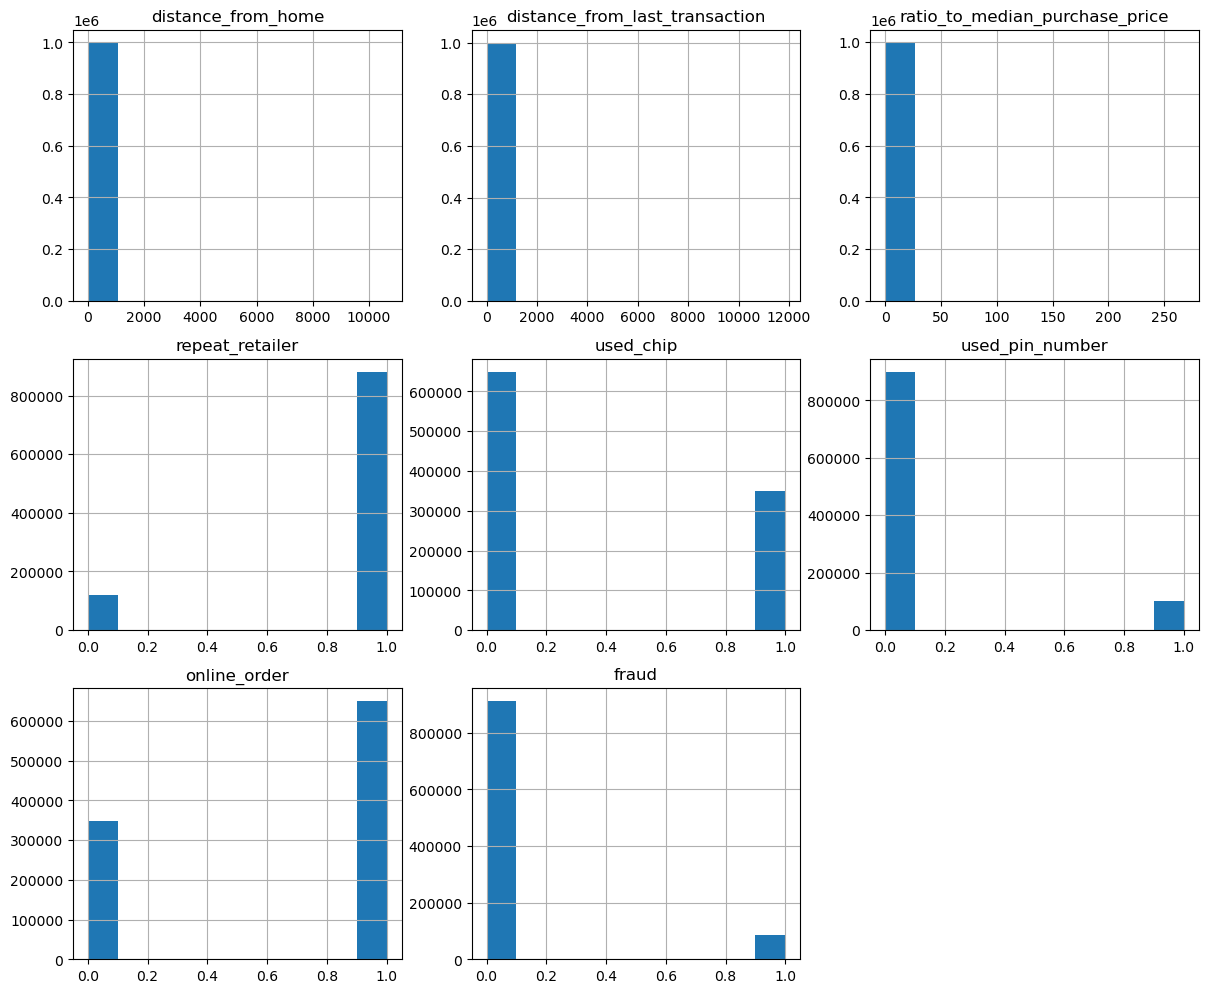

In [23]:
#Verificando através do histograma a distribuição de frequências em relação a fraudes
fig = plt.figure(figsize=(12,10))
dataset.hist(ax=fig)
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

In [ ]:
#Podemos notar que as maiores incidências de fraude com cartão de credito acontecem nas compras:
#repeat_retailer
#online-order
#used_chip
#user_pin_number

In [60]:
#Verificando a correlação
correlation = dataset.corr(method='pearson')
correlation

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
distance_from_home,1.000000,0.000193,-0.001374,0.143124,-0.000697,-0.001622,-0.001301,0.187571
distance_from_last_transaction,0.000193,1.000000,0.001013,-0.000928,0.002055,-0.000899,0.000141,0.091917
ratio_to_median_purchase_price,-0.001374,0.001013,1.000000,0.001374,0.000587,0.000942,-0.000330,0.462305
repeat_retailer,0.143124,-0.000928,0.001374,1.000000,-0.001345,-0.000417,-0.000532,-0.001357
used_chip,-0.000697,0.002055,0.000587,-0.001345,1.000000,-0.001393,-0.000219,-0.060975
used_pin_number,-0.001622,-0.000899,0.000942,-0.000417,-0.001393,1.000000,-0.000291,-0.100293
online_order,-0.001301,0.000141,-0.000330,-0.000532,-0.000219,-0.000291,1.000000,0.191973
fraud,0.187571,0.091917,0.462305,-0.001357,-0.060975,-0.100293,0.191973,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

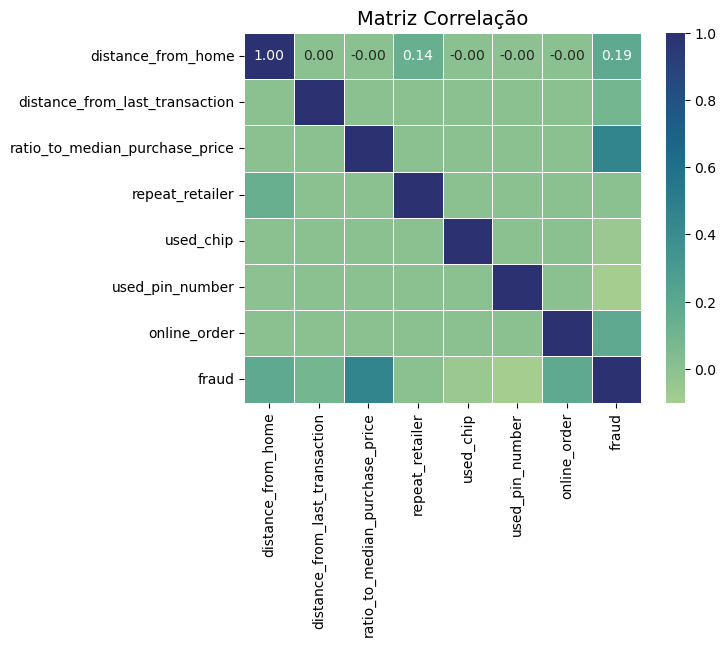

In [104]:
#Matriz de correlação
sns.heatmap(correlation, cmap = 'crest', fmt=".2f", linewidths=.6, annot = True)
plt.title('Matriz Correlação', fontsize=14)
plt.show

In [16]:
round(dataset['fraud'].value_counts(normalize=True)*100,2)

0.0    91.26
1.0     8.74
Name: fraud, dtype: float64

In [ ]:
#Preprocessamento

In [66]:
#Dividindo a base de dados
X=dataset.drop(columns='fraud',axis=1)
y=df['fraud']

In [69]:
#Separando a base de dados utilizando a técnica hold-out
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [72]:
#Visualizando a divisão da base de dados
print(X_train.shape, X_test.shape)

(800000, 7) (200000, 7)


In [71]:
# Dimensionamento de recursos usando StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [76]:
#Acerto o desiquilibrio da base de dados utilizando a técnica oversampling

smote = SMOTE(sampling_strategy = "minority", random_state = 7)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

In [77]:
print(pd.Series(y_train_resampled).value_counts(normalize = True)*100, 1)

0.0    50.0
1.0    50.0
Name: fraud, dtype: float64 1


In [ ]:
#Regressão Logística e Validação cruzada

In [84]:
lr = LogisticRegression(penalty = 'l2')

#Validação cruzada
cv = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)
scores = cross_val_score(lr, X_train_resampled, y_train_resampled, cv = cv, scoring = "roc_auc")

In [85]:
print(scores.mean())

0.9793398022773566


In [87]:
#
lr.fit(X_train_resampled, y_train_resampled)
y_pred = lr.predict(X_test_scaled)

In [89]:
#
auc_score = roc_auc_score(y_test, y_pred)
print(classification_report(y_test, y_pred))
print()
print(auc_score.mean())

              precision    recall  f1-score   support

         0.0       1.00      0.93      0.96    182557
         1.0       0.58      0.95      0.72     17443

    accuracy                           0.93    200000
   macro avg       0.79      0.94      0.84    200000
weighted avg       0.96      0.93      0.94    200000


0.9421726802903071


In [ ]:
#Apesar dos valores o nosso recall e f1-score são alto para a variável 1.
#O fator precision para detectar a variável 1 é baixo
#Isso quer dizer que o nosso modelo está tendo dificuldades em prever 1 quando o valor real é 1.
#Aqui provavelmente um algortímo de classificação mais robusto, como o SVM por exemplo, traria melhores resultados.

In [93]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Matriz de confusão
cf_matrix = confusion_matrix(y_test, y_pred)
cf_matrix

array([[170329,  12228],
       [   849,  16594]], dtype=int64)

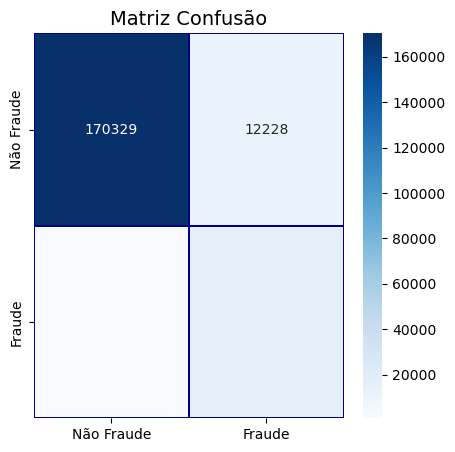

In [102]:
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cf_matrix, 
            xticklabels=['Não Fraude', 'Fraude'],
            yticklabels=['Não Fraude', 'Fraude'],
            fmt='d',
            annot=True,
            ax=ax1,
            linewidths=.2,
            linecolor="Darkblue",
            cmap="Blues")
plt.title('Matriz Confusão', fontsize=14)
plt.show()